In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [58]:
df = pd.read_csv('dataset.csv')

In [127]:
train = df[df['year'] < 2015]
val = df[df['year'] > 2014]

In [128]:
train_target = [(1 if deaths > 0 else 0) for deaths in train["deads"]]
val_target = [(1 if deaths > 0 else 0) for deaths in val["deads"]]

In [154]:
numeric_features = ["year"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"))
categorical_features = ["month", "brigade"]

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)

pipe = Pipeline(steps=[
    ('pre', preprocessor),
   ('scl', StandardScaler()),
   ('clf', LogisticRegression(max_iter=10000))])

parameters = {'clf__C':[0.01, 0.1, 1]}

log_reg = GridSearchCV(pipe, parameters)

In [155]:
log_reg.fit(train, train_target)

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['year']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['month',
                                                                          'brigade'])],
                                                          verbose_feature_names_out=False)),
                                       ('scl', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'clf__C': [0.01, 0.1, 1]})

In [156]:
pipe.fit(train, train_target)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['month', 'brigade'])],
                                   verbose_feature_names_out=False)),
                ('scl', StandardScaler()),
                ('clf', LogisticRegression(max_iter=10000))])

In [157]:
round(roc_auc_score(train_target, log_reg.predict_proba(train)[:,1]), 2)

0.66

In [158]:
round(roc_auc_score(val_target, log_reg.predict_proba(val)[:,1]), 2)

0.69

In [159]:
round(accuracy_score(train_target, log_reg.predict(train)), 2)

0.7

In [160]:
round(accuracy_score(val_target, log_reg.predict(val)), 2)

0.72

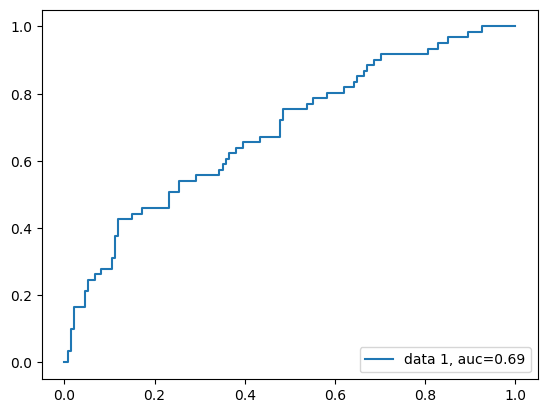

In [161]:
y_pred_proba = log_reg.predict_proba(val)[:,1]
fpr, tpr, _ = metrics.roc_curve(val_target,  y_pred_proba)
auc = roc_auc_score(val_target, log_reg.predict_proba(val)[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc, 2)))
plt.legend(loc=4)
plt.show()

In [162]:
test = pd.read_csv('NextMonthInputData.csv')

In [163]:
log_reg.predict_proba(test)[:,1]

array([0.25554381, 0.26450065, 0.1968147 , 0.30060763, 0.39244681,
       0.3900098 ])

In [164]:
log_reg.predict(test)

array([0, 0, 0, 0, 0, 0])

In [165]:
test

month  year  brigade
3 2023      1   NaN      NaN
  2023      2   NaN      NaN
  2023      3   NaN      NaN
  2023      4   NaN      NaN
  2023      5   NaN      NaN
  2023      6   NaN      NaN